## 24.1 Time Series Prediction

### Load and Plot the Time Series Dataset

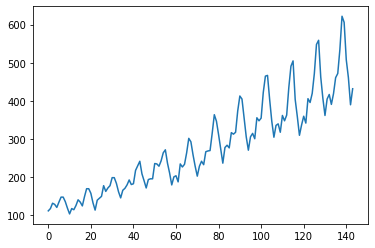

In [13]:
from pandas import read_csv
import matplotlib.pyplot as plt
dataset = read_csv( 'international-airline-passengers.csv' , usecols=[1], engine= 'python' ) # exclude first column (date)
plt.plot(dataset)
plt.show()

## 24.2 Multilayer Perceptron Regression

### Step1: Import Classes and Functions

In [14]:
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
# fix random seed for reproducibility
numpy.random.seed(7)

### Step2: Load Time Series Dataset

In [15]:
# load the dataset
dataframe = read_csv( 'international-airline-passengers.csv' , usecols=[1], engine= 'python' )
dataset = dataframe.values
dataset = dataset.astype( 'float32' )

### Step3: Split Dataset into Train and Test Set

In [16]:
train_size = int(len(dataset)*0.67) # training 67% and 33% for testing
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

96 48


### Step4: Define Function to Prepare Dataset for Modelling
**look_back** which is the number of previous time steps to use as input variables to predict the next time period

**X** is the number of passengers at a given time (t) 

**Y** is the number of passengers at the next time (t+1)

In [17]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
  dataX, dataY = [], []
  for i in range(len(dataset)-look_back-1):
    a = dataset[i:(i+look_back),0]
    dataX.append(a)
    dataY.append(dataset[i+look_back, 0])
  return numpy.array(dataX), numpy.array(dataY) 

### Step5: Call Function to Prepare Dataset for Modelling

In [18]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

### Step6: Define and Fit Multilayer Perceptron Model
a simple network with 1 input, 1 hidden layer with 8 neurons and an output layer.

In [19]:
# create and fit Multilayer Perceptron model
model = Sequential()
model.add(Dense(8, input_dim=look_back, activation= 'relu' ))
model.add(Dense(1))
model.compile(loss= 'mean_squared_error' , optimizer= 'adam' )
model.fit(trainX, trainY, epochs=200, batch_size=2, verbose=2)

Epoch 1/200
47/47 - 0s - loss: 28965.6406 - 400ms/epoch - 9ms/step
Epoch 2/200
47/47 - 0s - loss: 19010.1387 - 60ms/epoch - 1ms/step
Epoch 3/200
47/47 - 0s - loss: 11740.5693 - 78ms/epoch - 2ms/step
Epoch 4/200
47/47 - 0s - loss: 6909.8872 - 65ms/epoch - 1ms/step
Epoch 5/200
47/47 - 0s - loss: 3781.7861 - 71ms/epoch - 2ms/step
Epoch 6/200
47/47 - 0s - loss: 2084.0425 - 62ms/epoch - 1ms/step
Epoch 7/200
47/47 - 0s - loss: 1174.8986 - 64ms/epoch - 1ms/step
Epoch 8/200
47/47 - 0s - loss: 778.5304 - 72ms/epoch - 2ms/step
Epoch 9/200
47/47 - 0s - loss: 613.2026 - 71ms/epoch - 2ms/step
Epoch 10/200
47/47 - 0s - loss: 562.3741 - 67ms/epoch - 1ms/step
Epoch 11/200
47/47 - 0s - loss: 546.7812 - 62ms/epoch - 1ms/step
Epoch 12/200
47/47 - 0s - loss: 536.7294 - 54ms/epoch - 1ms/step
Epoch 13/200
47/47 - 0s - loss: 538.0604 - 65ms/epoch - 1ms/step
Epoch 14/200
47/47 - 0s - loss: 536.7751 - 60ms/epoch - 1ms/step
Epoch 15/200
47/47 - 0s - loss: 541.8118 - 75ms/epoch - 2ms/step
Epoch 16/200
47/47 - 0s

### Step7: Evaluate the Fit Model
Estimate the performance of the model on the train and test datasets

In [20]:
trainScore = model.evaluate(trainX, trainY, verbose=0)
print( 'Train Score: %.2f MSE (%.2f RMSE)' % (trainScore, math.sqrt(trainScore)))
testScore = model.evaluate(testX, testY, verbose=0)
print( 'Test Score: %.2f MSE (%.2f RMSE)' % (testScore, math.sqrt(testScore)))

Train Score: 529.63 MSE (23.01 RMSE)
Test Score: 2348.28 MSE (48.46 RMSE)


### Step8: Generate and Plot Prediction

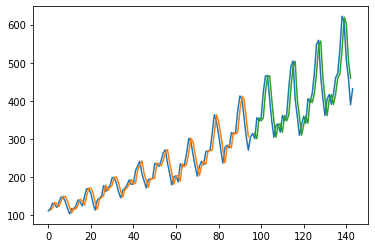

In [21]:
# generate predictions for training
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

# plot baseline and predictions
plt.plot(dataset)
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

### Full Code

Epoch 1/200
47/47 - 0s - loss: 16095.4336 - 372ms/epoch - 8ms/step
Epoch 2/200
47/47 - 0s - loss: 11928.5742 - 65ms/epoch - 1ms/step
Epoch 3/200
47/47 - 0s - loss: 8273.9297 - 64ms/epoch - 1ms/step
Epoch 4/200
47/47 - 0s - loss: 5400.2944 - 61ms/epoch - 1ms/step
Epoch 5/200
47/47 - 0s - loss: 3261.1653 - 67ms/epoch - 1ms/step
Epoch 6/200
47/47 - 0s - loss: 1896.3002 - 68ms/epoch - 1ms/step
Epoch 7/200
47/47 - 0s - loss: 1139.2196 - 58ms/epoch - 1ms/step
Epoch 8/200
47/47 - 0s - loss: 778.6276 - 67ms/epoch - 1ms/step
Epoch 9/200
47/47 - 0s - loss: 625.3763 - 61ms/epoch - 1ms/step
Epoch 10/200
47/47 - 0s - loss: 573.9509 - 71ms/epoch - 2ms/step
Epoch 11/200
47/47 - 0s - loss: 546.9925 - 73ms/epoch - 2ms/step
Epoch 12/200
47/47 - 0s - loss: 540.1639 - 68ms/epoch - 1ms/step
Epoch 13/200
47/47 - 0s - loss: 543.4534 - 63ms/epoch - 1ms/step
Epoch 14/200
47/47 - 0s - loss: 542.8009 - 69ms/epoch - 1ms/step
Epoch 15/200
47/47 - 0s - loss: 539.3228 - 66ms/epoch - 1ms/step
Epoch 16/200
47/47 - 0s 

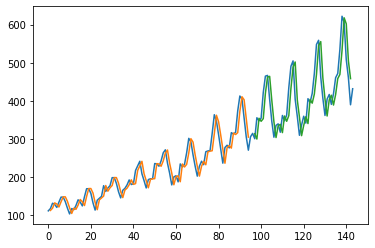

In [23]:
# Multilayer Perceptron to Predict International Airline Passengers (t+1, given t, t-1, t-2)
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense

# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
  dataX, dataY = [], []
  for i in range(len(dataset)-look_back-1):
    a = dataset[i:(i+look_back), 0]
    dataX.append(a)
    dataY.append(dataset[i + look_back, 0])
  return numpy.array(dataX), numpy.array(dataY)

# fix random seed for reproducibility
numpy.random.seed(7)

# load the dataset
dataframe = read_csv( 'international-airline-passengers.csv' , usecols=[1], engine= 'python' )
dataset = dataframe.values
dataset = dataset.astype( 'float32' )

# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

# create and fit Multilayer Perceptron model
model = Sequential()
model.add(Dense(8, input_dim=look_back, activation= 'relu' ))
model.add(Dense(1))
model.compile(loss= 'mean_squared_error' , optimizer= 'adam' )
model.fit(trainX, trainY, epochs=200, batch_size=2, verbose=2)

# Estimate model performance
trainScore = model.evaluate(trainX, trainY, verbose=0)
print( 'Train Score: %.2f MSE (%.2f RMSE)' % (trainScore, math.sqrt(trainScore)))
testScore = model.evaluate(testX, testY, verbose=0)
print( 'Test Score: %.2f MSE (%.2f RMSE)' % (testScore, math.sqrt(testScore)))

# generate predictions for training
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

# plot baseline and predictions
plt.plot(dataset)
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()


## 24.3 Multilayer Perceptron Using Window Method
Window Method = phrase the problem so that multiple recent time steps can be used to make the prediction for the next time step.

increase the look back argument from 1 to 3.

Epoch 1/400
46/46 - 0s - loss: 32028.5352 - 423ms/epoch - 9ms/step
Epoch 2/400
46/46 - 0s - loss: 2858.0154 - 63ms/epoch - 1ms/step
Epoch 3/400
46/46 - 0s - loss: 862.1038 - 62ms/epoch - 1ms/step
Epoch 4/400
46/46 - 0s - loss: 850.1699 - 61ms/epoch - 1ms/step
Epoch 5/400
46/46 - 0s - loss: 870.2769 - 66ms/epoch - 1ms/step
Epoch 6/400
46/46 - 0s - loss: 825.4949 - 61ms/epoch - 1ms/step
Epoch 7/400
46/46 - 0s - loss: 839.0715 - 69ms/epoch - 2ms/step
Epoch 8/400
46/46 - 0s - loss: 831.6024 - 66ms/epoch - 1ms/step
Epoch 9/400
46/46 - 0s - loss: 839.6942 - 68ms/epoch - 1ms/step
Epoch 10/400
46/46 - 0s - loss: 819.0958 - 69ms/epoch - 1ms/step
Epoch 11/400
46/46 - 0s - loss: 838.1457 - 67ms/epoch - 1ms/step
Epoch 12/400
46/46 - 0s - loss: 829.6400 - 74ms/epoch - 2ms/step
Epoch 13/400
46/46 - 0s - loss: 852.2626 - 71ms/epoch - 2ms/step
Epoch 14/400
46/46 - 0s - loss: 798.0011 - 62ms/epoch - 1ms/step
Epoch 15/400
46/46 - 0s - loss: 784.3578 - 58ms/epoch - 1ms/step
Epoch 16/400
46/46 - 0s - loss

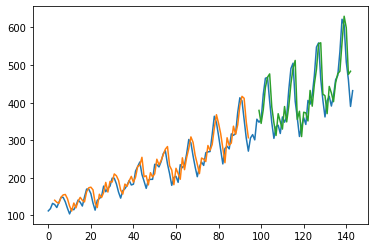

In [22]:
# Multilayer Perceptron to Predict International Airline Passengers (t+1, given t, t-1, t-2)
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense

# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
  dataX, dataY = [], []
  for i in range(len(dataset)-look_back-1):
    a = dataset[i:(i+look_back), 0]
    dataX.append(a)
    dataY.append(dataset[i + look_back, 0])
  return numpy.array(dataX), numpy.array(dataY)

# fix random seed for reproducibility
numpy.random.seed(7)

# load the dataset
dataframe = read_csv( 'international-airline-passengers.csv' , usecols=[1], engine= 'python' )
dataset = dataframe.values
dataset = dataset.astype( 'float32' )

# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

# reshape dataset
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

# create and fit Multilayer Perceptron model
model = Sequential()
model.add(Dense(12, input_dim=look_back, activation= 'relu' ))
model.add(Dense(8, activation= 'relu' ))
model.add(Dense(1))
model.compile(loss= 'mean_squared_error' , optimizer= 'adam' )
model.fit(trainX, trainY, epochs=400, batch_size=2, verbose=2)

# Estimate model performance
trainScore = model.evaluate(trainX, trainY, verbose=0)
print( 'Train Score: %.2f MSE (%.2f RMSE)' % (trainScore, math.sqrt(trainScore)))
testScore = model.evaluate(testX, testY, verbose=0)
print( 'Test Score: %.2f MSE (%.2f RMSE)' % (testScore, math.sqrt(testScore)))

# generate predictions for training
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

# plot baseline and predictions
plt.plot(dataset)
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()